To get familiar with the data, I looked at some specific time series of the countries. 

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
df_country_temperatures = pd.read_csv("data/archive/GlobalLandTemperaturesByCountry.csv",
                                      index_col="dt",
                                      parse_dates=True)

In [5]:
# Take a look at the data
df_country_temperatures.head(10)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland


In [6]:
# Ensure datetime index has been read correctly
df_country_temperatures.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=577462, freq=None)

In [7]:
# Take a sample country
df_albania_temperatures = df_country_temperatures.loc[df_country_temperatures["Country"]=="Albania"]

<AxesSubplot:xlabel='dt'>

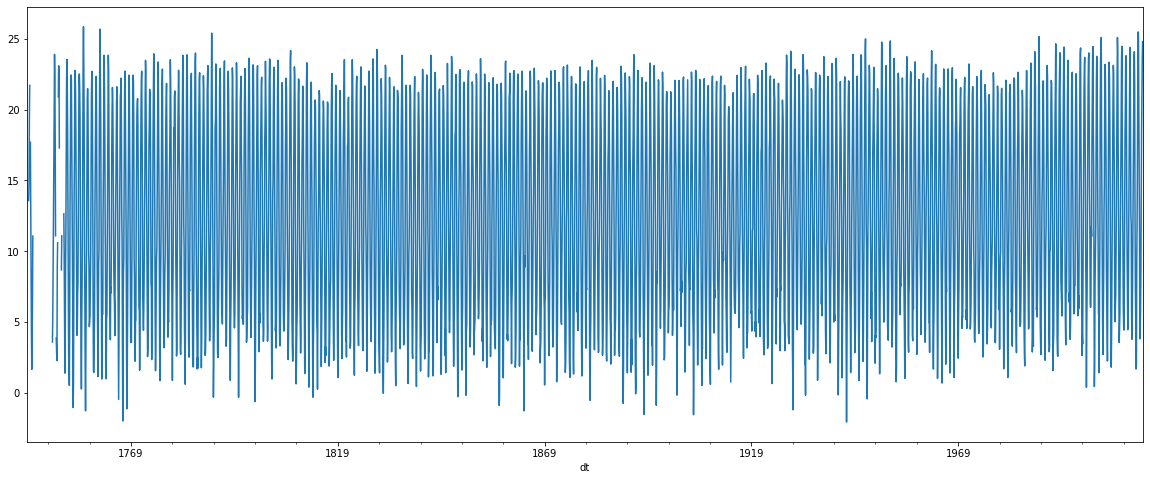

In [8]:
df_albania_temperatures["AverageTemperature"].plot(figsize=(20,8))

Data looks as expected. Missing values are noticeable. To get a more global Idea and get a general Idea about the data quality (i.e. missing values) and data uniformity (i.e. starting dates) of all countries, we iterate through the countries and generate the information of interest.

In [9]:
countries = df_country_temperatures["Country"].unique()

In [10]:
start_year = []
sum_nans = []
prct_nan = []
# data quality check
for country in countries:
    df_country = df_country_temperatures.loc[df_country_temperatures["Country"]==country]
    start_year.append(df_country.index.min().year)
    num_nans_country = df_country["AverageTemperature"].isna().sum()
    sum_nans.append(num_nans_country)
    prct_nan.append(num_nans_country/len(df_country))

In [12]:
df_data_quality = pd.DataFrame(data={
    "Country": countries,
    "Starting Year": start_year,
    "# Missing values": sum_nans,
    "% Missing values": prct_nan
})

In [13]:
df_data_quality

,Country,Starting Year,# Missing values,% Missing values
0,Åland,1743,73,0.022538
1,Afghanistan,1838,21,0.009972
2,Africa,1850,71,0.036132
3,Albania,1743,73,0.022538
4,Algeria,1787,19,0.006983
...,...,...,...,...
238,Virgin Islands,1824,190,0.083443
239,Western Sahara,1787,185,0.067990
240,Yemen,1876,4,0.002420
241,Zambia,1850,275,0.139949


First, we look at the **distribution of the starting year** (year in which data recording begins in the respective countries)

<AxesSubplot:>

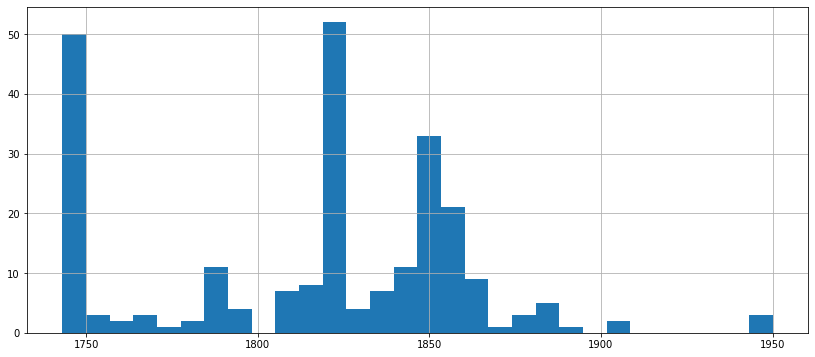

In [15]:
df_data_quality["Starting Year"].hist(figsize=(14,6), bins=30)

looks like data is available from 1850 for the most countries. Next: How many data points are usually missing for each country?

<AxesSubplot:>

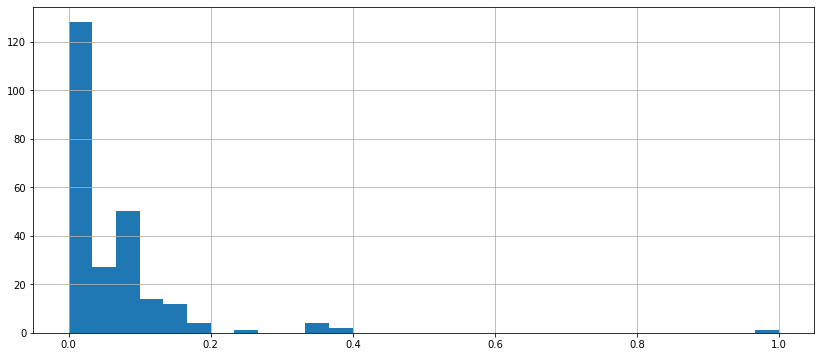

In [16]:
df_data_quality["% Missing values"].hist(figsize=(14,6), bins=30)

Does not look like a lot of missing data. This will most likely not be a problem.